In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [2]:
augmentation_loss_frame = pd.read_csv("results/spreadsheets/warm_start_model_aug_loss_unnormalized.csv")

In [3]:
augmentation_loss_frame["loss_1"] = augmentation_loss_frame["loss"] / augmentation_loss_frame["length"]

In [5]:
augmentation_loss_frame

,Unnamed: 0,src,tgt,tag,length,loss,loss_1
0,0,fpvure,fpvured,V;PST,8,7.943930,0.992991
1,1,ijtgreut,ijtgreuted,V;PST,11,32.169254,2.924478
2,2,qno,qnoed,V;PST,6,12.383417,2.063903
3,3,loyr,loyred,V;PST,7,5.451545,0.778792
4,4,quix,quix,V;PST,5,8.979031,1.795806
...,...,...,...,...,...,...,...
9994,9994,huzt,huzt,V;PST,5,8.369371,1.673874
9995,9995,soarv,soarvd,V;PST,7,11.292818,1.613260
9996,9996,wec,wec,V;PST,4,6.974558,1.743640
9997,9997,ptlfx,ptlfxed,V;PST,8,12.956491,1.619561


<AxesSubplot:xlabel='length', ylabel='loss_1'>

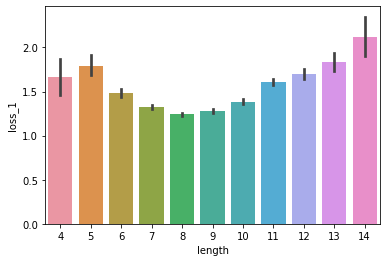

In [7]:
sns.barplot(data=augmentation_loss_frame, x="length", y="loss_1")

In [11]:
r_space = np.linspace(0.1, 1, 5)
r_space

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [16]:
loss_frames = []
for r in r_space:
    loss_frame = augmentation_loss_frame[["length", "loss"]].copy()
    norm_vector = augmentation_loss_frame["length"].pow(r)
    loss_frame['loss_normalized'] = augmentation_loss_frame["loss"] / norm_vector
    loss_frame['r'] = r
    loss_frames.append(loss_frame)
complete_loss_frame = pd.concat(loss_frames)
print(complete_loss_frame)

      length       loss  loss_normalized    r
0          8   7.943930         6.452476  0.1
1         11  32.169254        25.310558  0.1
2          6  12.383417        10.352026  0.1
3          7   5.451545         4.487555  0.1
4          5   8.979031         7.644208  0.1
...      ...        ...              ...  ...
9994       5   8.369371         1.673874  1.0
9995       7  11.292818         1.613260  1.0
9996       4   6.974558         1.743640  1.0
9997       8  12.956491         1.619561  1.0
9998       8  12.629440         1.578680  1.0

[49995 rows x 4 columns]


<AxesSubplot:xlabel='length', ylabel='loss_normalized'>

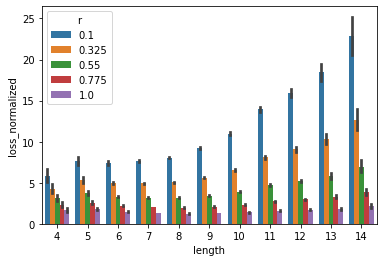

In [17]:
sns.barplot(data=complete_loss_frame, x="length", y="loss_normalized", hue="r")

In [20]:
complete_loss_frame['sample_prob'] = sp.special.softmax(complete_loss_frame['loss_normalized'])

In [30]:
softmax_loss_frame = complete_loss_frame[~complete_loss_frame['r'].isin([0.325])]

3.5720011062578897e-07

<AxesSubplot:xlabel='length', ylabel='sample_prob'>

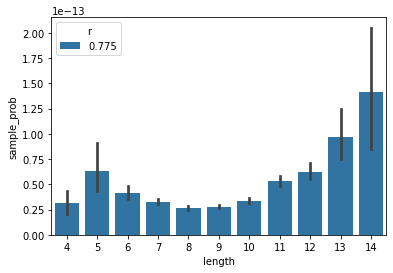

In [32]:
sns.barplot(data=complete_loss_frame[complete_loss_frame['r'].isin([0.775])], x="length", y="sample_prob", hue="r")

In [ ]:
# TODO: plot k-means cluster sizes